# Part I - (FIFA)
## by (Nduta Elsie)

## Introduction
Football analytics

Detailed attributes for every player registered in the latest edition of FIFA 19 database.




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
Football = pd.read_excel('data.xlsx')

### Data Assessing

In [3]:
Football.shape

(18207, 88)

In [4]:
Football.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null 

### Data Cleaning

- Remove columns not needed for my analysis.

- Remove duplicated data if any.

- Remove null values  if any.

- Check for correct data types.

In [5]:
# Removing the columns not needed
Football.drop(['Photo', 'Flag', 'Club Logo', 'Special', 'Real Face', 'Loaned From'], axis=1, inplace = True)

In [6]:
Football.drop(Football.columns[21:47],axis=1, inplace = True)

In [7]:
# verifying the drop worked 
Football.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 56 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Nationality                 18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18207 non-null object
Position                    18147 non-null object
Jersey Number               18147 non-null float64
Joined                      16654 non-nul

In [8]:
# checking for duplicated values
Football.duplicated().sum()

0

In [9]:
# checking for null values
Football.isnull().sum()

ID                             0
Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                         241
Value                          0
Wage                           0
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Work Rate                     48
Body Type                      0
Position                      60
Jersey Number                 60
Joined                      1553
Contract Valid Until         289
Height                        48
Weight                        48
Crossing                      48
Finishing                     48
HeadingAccuracy               48
ShortPassing                  48
Volleys                       48
Dribbling                     48
Curve                         48
FKAccuracy                    48
LongPassing                   48
BallContro

In [10]:
# droping rows with null values
Football.dropna(axis = 0, inplace=True)

In [11]:
#verifying null values have been droped.
Football.shape

(16643, 56)

In [12]:
# Firstly lets remove character signs from Value, Wage, Release Clause
Football['Value'] = Football['Value'].str.replace('€', '')
Football['Wage'] = Football['Wage'].str.replace('€', '')
Football['Release Clause'] = Football['Release Clause'].str.replace('€', '')

In [13]:
Football.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110.5M,565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77M,405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5M,290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,72M,260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102M,355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4M


In [14]:
#Removing K and replace with '000' and remove M and replace with '000000'
# remove K, replace with '000'
Football['Value'] = Football.loc[:, 'Value'].map(lambda x: x.replace('K','000'))
Football['Wage'] = Football.loc[:, 'Wage'].map(lambda x: x.replace('K','000'))
Football['Release Clause'] = Football.loc[:, 'Release Clause'].map(lambda x: x.replace('K','000'))

In [15]:
# remove M, replace with '000000'
Football['Value'] = Football.loc[:, 'Value'].map(lambda x: x.replace('M','000000'))
Football['Wage'] = Football.loc[:, 'Wage'].map(lambda x: x.replace('M','000000'))
Football['Release Clause'] = Football.loc[:, 'Release Clause'].map(lambda x: x.replace('M','000000'))

In [16]:
# remove '.' replace with ''
Football['Value'] = Football['Value'].str.replace('.', '')
Football['Release Clause'] = Football['Release Clause'].str.replace('.', '')

In [17]:
# remove '000000' replace with '00000'
Football['Value'] = Football.loc[:, 'Value'].map(lambda x: x.replace('000000','00000'))
Football['Release Clause'] = Football.loc[:, 'Release Clause'].map(lambda x: x.replace('000000','00000'))

In [18]:
# remove K, replace with '000'
Football['Height'] = Football.loc[:, 'Height'].map(lambda x: x.replace("'",'.'))
Football['Weight'] = Football.loc[:, 'Weight'].map(lambda x: x.replace('lbs',''))

In [19]:
Football.head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000,565000,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,7700000,405000,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000,290000,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000
3,193080,De Gea,27,Spain,91,93,Manchester United,7200000,260000,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,10200000,355000,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,9300000,340000,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,6700000,420000,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,8000000,455000,Right,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,16400000
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,5100000,380000,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000
9,200389,J. Oblak,25,Slovenia,90,93,Atlético Madrid,6800000,94000,Right,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,144500000


In [20]:
# correct column name
Football.rename(columns={'Release Clause':'Release_clause', 'Preferred Foot':'Preferred_foot', 
                   'International Reputation':'International_reputation', 'Weak Foot':'Weak_foot', 
                   'Skill Moves':'Skill_moves', 'Work Rate':'Work_rate', 'Body Type':'Body_type', 'Jersey Number':'Jersey_number',
                   'Contract Valid Until':'Contract_valid_until', 'Release Clause':'Release_clause'}, inplace = True)

In [21]:
# viewing datatypes
Football.dtypes

ID                                   int64
Name                                object
Age                                  int64
Nationality                         object
Overall                              int64
Potential                            int64
Club                                object
Value                               object
Wage                                object
Preferred_foot                      object
International_reputation           float64
Weak_foot                          float64
Skill_moves                        float64
Work_rate                           object
Body_type                           object
Position                            object
Jersey_number                      float64
Joined                      datetime64[ns]
Contract_valid_until                object
Height                              object
Weight                              object
Crossing                           float64
Finishing                          float64
HeadingAccu

In [22]:
#change datatypes
Football['Value'] = Football['Value'].astype(int)
Football['Wage'] = Football['Wage'].astype(int)
Football['Release_clause'] = Football['Release_clause'].astype(int)
Football['Height'] = Football['Height'].astype(float)
Football['Weight'] = Football['Weight'].astype(int)
Football['Jersey_number'] = Football['Jersey_number'].astype(int)
Football['Contract_valid_until'] = pd.to_datetime(Football['Contract_valid_until'])
Football.iloc[:, 10:13] = Football.iloc[:, 10:13].astype(int)
Football.iloc[:, 21:55] = Football.iloc[:, 21:55].astype(int)


In [23]:
# convert source to category datatype
Football.Body_type = Football.Body_type.astype("category")
Football.Position = Football.Position.astype("category")
Football.Work_rate = Football.Work_rate.astype("category")

In [24]:
Football.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred_foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release_clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000,565000,Left,...,96,33,28,26,6,11,15,14,8,226500000
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,7700000,405000,Right,...,95,28,31,23,7,11,15,14,11,127100000
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000,290000,Right,...,94,27,24,33,9,9,15,15,11,228100000
3,193080,De Gea,27,Spain,91,93,Manchester United,7200000,260000,Right,...,68,15,21,13,90,85,87,88,94,138600000
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,10200000,355000,Right,...,88,68,58,51,15,13,5,10,13,196400000


### Feature(s) of interest?

- Does the player's Age or  Position have a huge effect on a player's value which will then determine how much the player earns.

- Does the Height and Weight determine the position a player can take.

- Does the ranking of a player depend on their nationality.

- What's the most played positions.

In [25]:
# descriptive statistics for numeric variables
print(Football.describe())

                  ID           Age       Overall     Potential         Value  \
count   16643.000000  16643.000000  16643.000000  16643.000000  1.664300e+04   
mean   213845.010094     25.226221     66.162771     71.140900  1.611506e+06   
std     30546.285826      4.716588      7.008236      6.151409  3.991862e+06   
min        16.000000     16.000000     46.000000     48.000000  1.000000e+04   
25%    199569.500000     21.000000     62.000000     67.000000  2.800000e+05   
50%    221493.000000     25.000000     66.000000     71.000000  6.000000e+05   
75%    236802.000000     29.000000     71.000000     75.000000  1.300000e+06   
max    246620.000000     45.000000     94.000000     95.000000  1.185000e+08   

                Wage  International_reputation     Weak_foot   Skill_moves  \
count   16643.000000              16643.000000  16643.000000  16643.000000   
mean     9618.037613                  1.114823      2.942919      2.349516   
std     22263.518927                  0.39855

## Univariate Exploration

#### Continous Variables

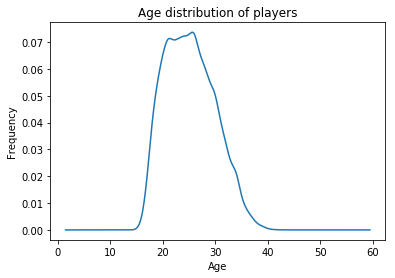

In [30]:
#Distribution plot of the age of players
ax = Football['Age'].plot.kde()
plt.title('Age distribution of players')
plt.xlabel('Age')
plt.ylabel('Frequency');

Distribution is slightly positively skewed. This explains why the mean is greater than median and median greater than the mode.

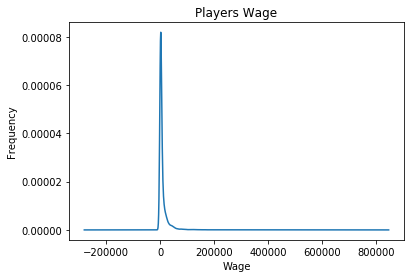

In [33]:
# Distribution plot of players wages
aw = Football['Wage'].plot.kde()
plt.title('Players Wage')
plt.xlabel('Wage')
plt.ylabel('Frequency');

Most players wages range between 0 and 100000.

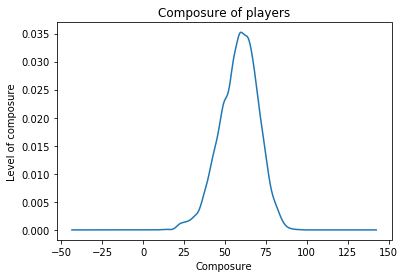

In [35]:
# Distribution plot of players composure
aw = Football['Composure'].plot.kde()
# Add labels
plt.title('Composure of players')
plt.xlabel('Composure')
plt.ylabel('Level of composure');

The distribution plot of platyers composure is normal most ranging from 25 to 87.5

#### Categorical Variables

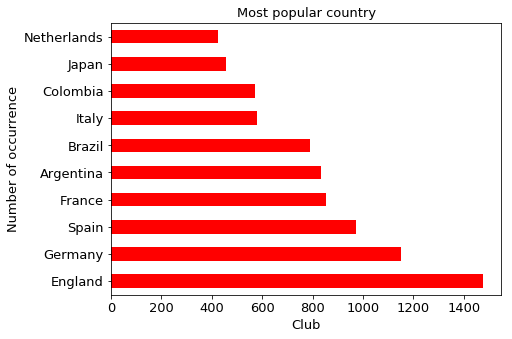

In [61]:
# Top 10 nationalities
nation = Football.Nationality.value_counts()[0:10]

#plot
g_bar = nation.plot.barh(color = 'Red', fontsize = 13)

#figure size(width, height)
g_bar.figure.set_size_inches(7, 5);

#Add labels
plt.title('Most popular country', color = 'black', fontsize = '13')
plt.xlabel('Club', color = 'black', fontsize = '13')
plt.ylabel('Number of occurrence', color = 'black', fontsize = '13');

Viewed the countries that appeared most in the data. England tops the ranking.

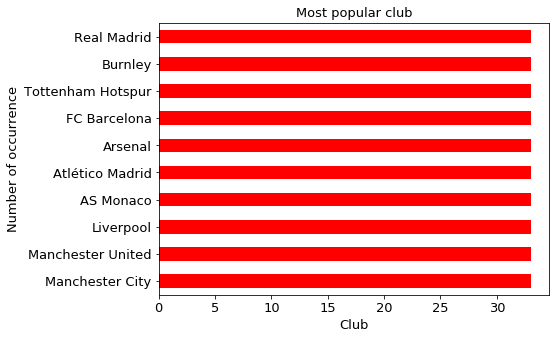

In [62]:
#Top 10 football clubs
club = Football.Club.value_counts()[0:10]

#plot
g_bar = club.plot.barh(color = 'Red', fontsize = 13)

#figure size(width, height)
g_bar.figure.set_size_inches(7, 5);

#Add labelbs
plt.title('Most popular club', color = 'black', fontsize = '13')
plt.xlabel('Club', color = 'black', fontsize = '13')
plt.ylabel('Number of occurrence', color = 'black', fontsize = '13');

The number of occurences of the top 10 clubs seem to be the same though we notice that among the top 10 6 clubs are from England.

In [63]:
#Analyzing the positions of the players

position_count = Football['Position'].value_counts()
position_order = position_count.index

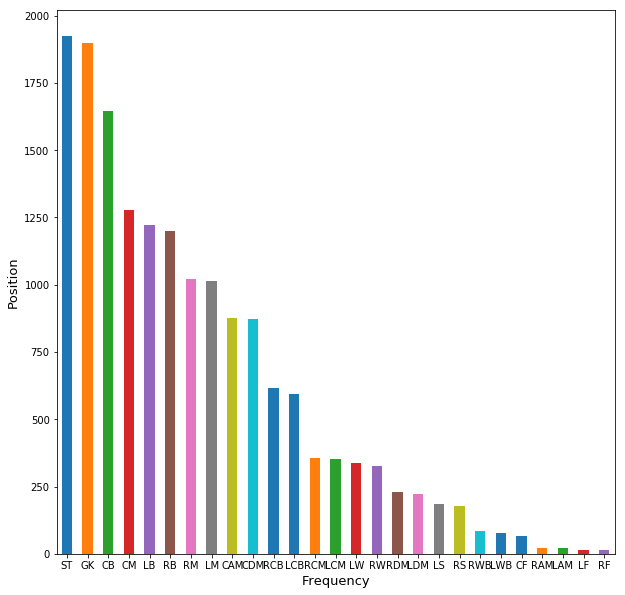

In [73]:
ax = plt.subplots(1,1, figsize=(10,10))
axX = position_count.plot.bar(x='lab', y='val', rot=0)
plt.ylabel('Position', color = 'black', fontsize = '13')
plt.xlabel('Frequency', color = 'black', fontsize = '13');

Most players in the data play the position ST which is the top striker in the team.

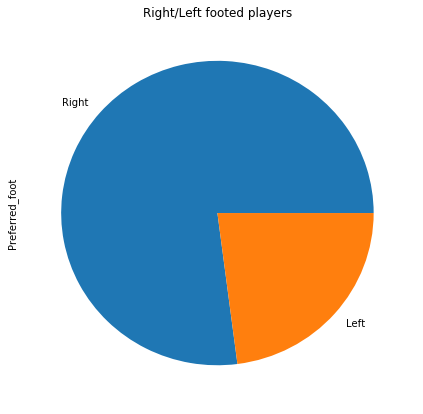

In [88]:
#Weak foot used by most players
df = Football['Preferred_foot'].value_counts()
df.plot.pie(title="Right/Left footed players", y='Preffered foot',figsize= (7,7))

Most players seem to preffered to use there right foot.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Poorly format at the players Height distribution,67 instead of 6'7.Fixed that and also some missing values were in columns like clubs, Joined, Contract and removed such rows.

## Bivariate Exploration

0.449607670539


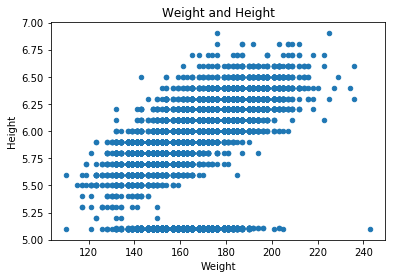

In [90]:
# Correlation between weight and height
correlation1 = Football['Weight'].corr(Football['Height'])
print(correlation1)

Football.plot(x='Weight', y='Height', kind='Scatter', title = 'Weight and Height');

The weight and height of a player are correlated by 44.96% weak correlation.

0.618249522941


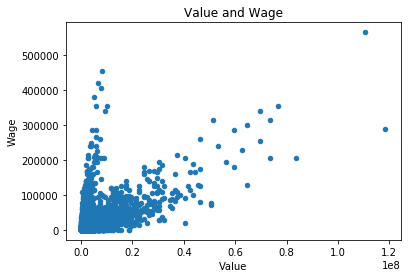

In [48]:
# Correlation between Value and Wage
correlation2 = Football['Value'].corr(Football['Wage'])
print(correlation2)

Football.plot(x='Value', y='Wage', kind='Scatter', title = 'Value and Wage');

Correlation between the wage and value of a player is 61.8% most players value ranges below 0.3 and their wages below 200000

0.613220298806


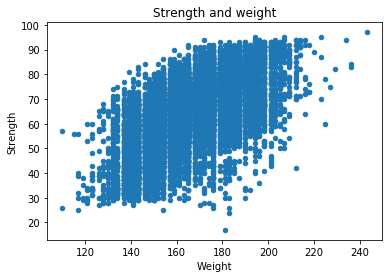

In [50]:
# Correlation between weight and strength
correlation3 = Football['Weight'].corr(Football['Strength'])
print(correlation3)

Football.plot(x='Weight', y='Strength', kind='Scatter', title = 'Strength and weight');

There is a strong relationship between the weight and strenth of a player,with a correlation of 61.3%

0.613220298806


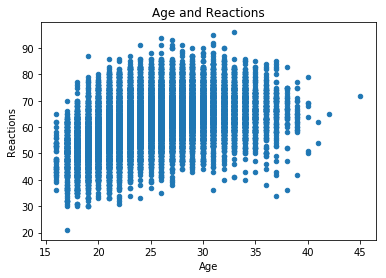

In [52]:
# Correlation between weight and strength
correlation4 = Football['Weight'].corr(Football['Strength'])
print(correlation4)

Football.plot(x='Age', y='Reactions', kind='Scatter', title = 'Age and Reactions');


The correlation between Age and Rection is positive at 61.3%

In [54]:
Football_hist = Football[['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Height', 'Weight', 'Finishing', 'HeadingAccuracy', 
                     'Acceleration','SprintSpeed','Stamina','Strength','GKReflexes','Release_clause']]

corr = Football_hist.corr()

corr.style.background_gradient(cmap='coolwarm');

,Age,Overall,Potential,Value,Wage,Height,Weight,Finishing,HeadingAccuracy,Acceleration,SprintSpeed,Stamina,Strength,GKReflexes,Release_clause
Age,1,0.464977,-0.236762,0.0591298,0.148525,0.0555866,0.232396,0.0774654,0.153163,-0.152913,-0.145548,0.103525,0.340691,0.10147,0.0507939
Overall,0.464977,1,0.663346,0.493639,0.573896,0.0406103,0.154207,0.334448,0.345059,0.199305,0.214794,0.370981,0.357173,-0.0249034,0.580816
Potential,-0.236762,0.663346,1,0.455689,0.490633,0.0130242,-0.00859531,0.241756,0.203994,0.235132,0.238926,0.206223,0.0796723,-0.0526206,0.555201
Value,0.0591298,0.493639,0.455689,1,0.61825,0.0077944,0.0317911,0.209503,0.155657,0.147474,0.149373,0.180579,0.101531,-0.0374602,0.709364
Wage,0.148525,0.573896,0.490633,0.61825,1,0.023457,0.0652545,0.214712,0.189772,0.125054,0.13059,0.181262,0.142183,-0.0245292,0.819205
Height,0.0555866,0.0406103,0.0130242,0.0077944,0.023457,1,0.449608,-0.283001,-0.0530774,-0.379348,-0.325515,-0.238023,0.286377,0.287268,0.0116627
Weight,0.232396,0.154207,-0.00859531,0.0317911,0.0652545,0.449608,1,-0.29686,0.0305034,-0.479606,-0.413392,-0.225622,0.61322,0.344147,0.036336
Finishing,0.0774654,0.334448,0.241756,0.209503,0.214712,-0.283001,-0.29686,1,0.478874,0.608697,0.595016,0.518701,-0.00709774,-0.59103,0.230824
HeadingAccuracy,0.153163,0.345059,0.203994,0.155657,0.189772,-0.0530774,0.0305034,0.478874,1,0.337106,0.385233,0.639715,0.48748,-0.751404,0.168234
Acceleration,-0.152913,0.199305,0.235132,0.147474,0.125054,-0.379348,-0.479606,0.608697,0.337106,1,0.922223,0.612358,-0.162558,-0.597628,0.159555


 #### Observations

- Acceleration has a negative correlation with Weight.

- Potential has a positive correlation with Release clause.

- As expected Age has a negative correlation with Potential.

- Value has a positive correlation with Wage.

- Wage has a positive correlation with Release clause.

- There is a negative correlaton between Finishing and Strength.

- Surprisingly there is a really strong positive correlation between Finishing and Dribbling.

- Another surprising strong positively correlation between Acceleration and Dribbling.

- A negative relationship between Strength and Finishing, Strength, Dribblinng.

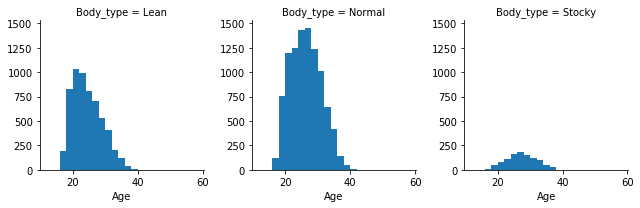

In [91]:
# Distribution of players body type
# plotting Facet
bins = np.arange(12, 58+2, 2)
g = sb.FacetGrid(data = Football, col = 'Body_type')
g.map(plt.hist, 'Age', bins = bins);

 Most of our players in the data have a normal body type, and very few players have a stocky body type.

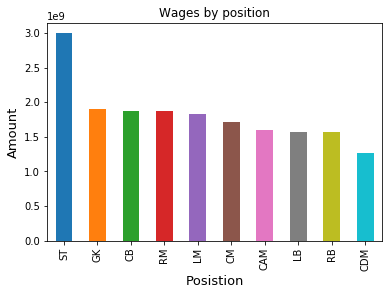

In [95]:
# Top 10 clubs that pay more wages
#Group by club then sum the wage.
wages10 = Football.groupby('Position')['Value'].sum().sort_values(ascending = False).head(10)

# plot
wages10.plot.bar(title="Value by position")
plt.ylabel('Value', color = 'black', fontsize = '13')
plt.xlabel('Position', color = 'black', fontsize = '13');

Strikers position players are the most valued.

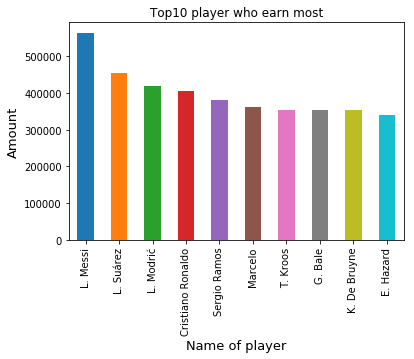

In [101]:
# Top 10 players who earn the most
# Group by name then sum the wage.
p_wages10 = Football.groupby('Name')['Wage'].sum().sort_values(ascending = False).head(10)

# plot
p_wages10.plot.bar(title="Top10 player who earn most")
plt.ylabel('Amount', color = 'black', fontsize = '13')
plt.xlabel('Name of player', color = 'black', fontsize = '13');

Messi earns the most

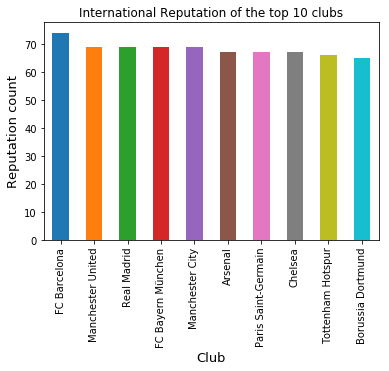

In [104]:
# Does nationality play a role in the value of the player

# Group by nationality then sum the value.
p_nation = Football.groupby('Club')['International_reputation'].sum().sort_values(ascending = False).head(10)

# plot
p_nation.plot.bar(title="International Reputation of the top 10 clubs")
plt.ylabel('Reputation count', color = 'black', fontsize = '13')
plt.xlabel('Club', color = 'black', fontsize = '13');

Fc Barcelona ranks highest in its reputation

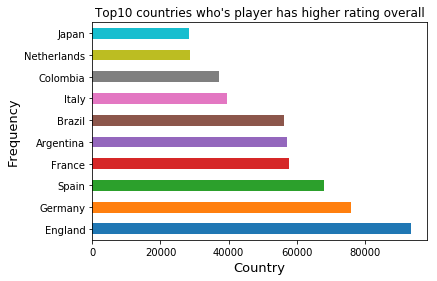

In [105]:
# Countries with the highest players ratings
# Group by nationality then sum the value.
p_overall = Football.groupby('Nationality')['Overall'].sum().sort_values(ascending = False).head(10)

# plot
p_overall.plot.barh(title="Top10 countries who's player has higher rating overall")
plt.ylabel('Frequency', color = 'black', fontsize = '13')
plt.xlabel('Country', color = 'black', fontsize = '13');

Overall England players have the highest player ratings on FIFA

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

 - Started by viewing the relationship between Weight and Height, there was a weak positive relationship between both features. Player value and wage has a fairly strong relationship, in most cases when a player is valued in a club, he also gets well paid too. Surprisingly Weight and Strength has a strong correlation. 
 
 - Had a look at some relationship between quantitative and qualitative features in the data. Right-footed and Left-footed players got rated '3' more, for their weaker foot. And also most players in the data have a normal body type. Only few players have a stocky body type.
 
 - Wage has a positive correlation with Release clause. The higher a player's salary is, the higher clubs also set his release clause. Most football clubs see it as a way to tie a player to their club.
 
 - This came as a 'No suprise', Acceleration has a negative correlation with Weight. The more a player weighs, his acceleration reduces. And also as expected Age has a negative correlation with Potential. Based on reasoning, when a player gets older he is no longer referred to as a potential. Young players are mostly seen as players with potentials.
 
 - Had a look at the club with the highest Wage. Real Madrid has the most Wage. This tells us they have a high number of high profile players, which is why they are referred to as All stars team.
 
 - Messi earns more than any other player.Also tried to see if Nationality has any role to play with a player's valuation.Noticed Spanish and Brazilian players are valued most. English players have the highest player ratings on FIFA19.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- Players who play Right-forward positions are valued more than other positions. Then the Right-wing back and Left-wing back are valued lowest.

## Multivariate Exploration

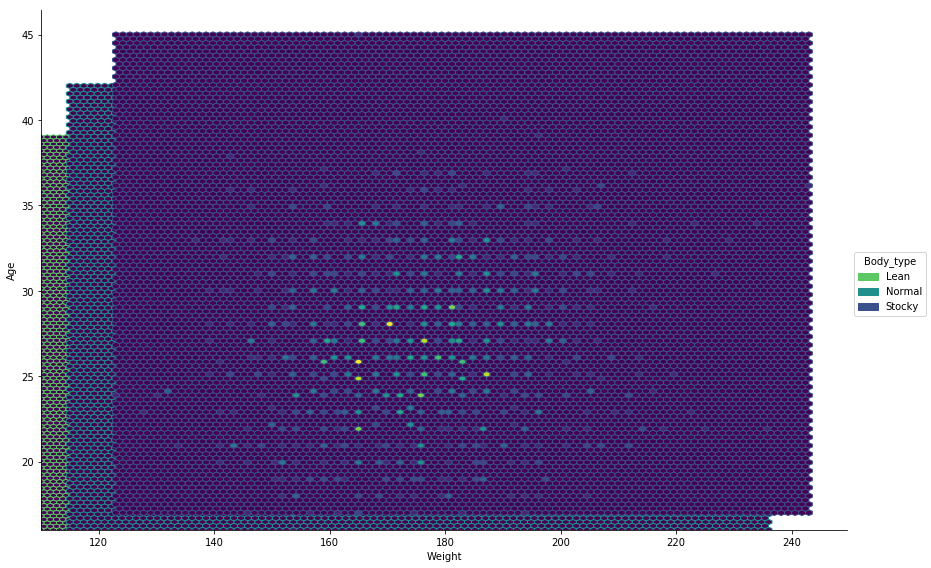

In [113]:
# plotting facet
g = sb.FacetGrid(data = Football, hue = 'Body_type', size = 8, aspect = 1.5, palette = 'viridis_r')
g.map(plt.hexbin, 'Weight', 'Age')
g.add_legend();

Most of the younger players weighs lesser and they also have more of a lean body type.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Looked further into how infuential the Age feature and acceleration could be regarding a player's work rate, it's so obvious now that as a player ages, so does his acceleration but in some cases a player's age does not influence his work rate. Players whose work rate is High/High, High/Medium have a high acceleration and the Low/Low have a lower acceleration.
